# **Machine Learning / Prédiction Genres**

## **Imports et Dataframes**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow

from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder, StandardScaler, RobustScaler, PolynomialFeatures, OrdinalEncoder
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV, RandomizedSearchCV, learning_curve, KFold
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import SelectKBest, chi2, f_classif

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, f1_score, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report

from xgboost import XGBClassifier

from joblib import dump
from joblib import load

import warnings

In [2]:
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 200

In [4]:
df = pd.read_csv('../data/data_110k_lignes.csv')

the_dfs = []

In [5]:
df

,Unnamed: 0,artist_name,album_name,album_id,track_name,track_id,popularity,release_date,duration_ms,explicit,external_urls,is_local,preview_url,track_number,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms.1,time_signature
0,0,Gen Hoshino,Comedy,41ERrwfzos93Xlf6hFBiDn,Comedy,5SuOikwiRyPMVoIQDJUgSV,66,2022-04-08,230666,False,https://open.spotify.com/track/5SuOikwiRyPMVoI...,False,https://p.scdn.co/mp3-preview/56ee6d51af5c3a28...,1,acoustic,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,audio_features,5SuOikwiRyPMVoIQDJUgSV,spotify:track:5SuOikwiRyPMVoIQDJUgSV,https://api.spotify.com/v1/tracks/5SuOikwiRyPM...,https://api.spotify.com/v1/audio-analysis/5SuO...,230667,4
1,1,Ray LaMontagne,I Was Born To Love You,7cwHkTgTHLbCUFB6hRi9QQ,I Was Born To Love You,3PG6V5yuFfo4APiovOQoRv,64,2022-04-08,265843,False,https://open.spotify.com/track/3PG6V5yuFfo4APi...,False,https://p.scdn.co/mp3-preview/46ff8588929ba7bd...,1,acoustic,0.650,0.271,9,-11.081,1,0.0314,0.7940,0.000069,0.1960,0.2100,78.036,audio_features,3PG6V5yuFfo4APiovOQoRv,spotify:track:3PG6V5yuFfo4APiovOQoRv,https://api.spotify.com/v1/tracks/3PG6V5yuFfo4...,https://api.spotify.com/v1/audio-analysis/3PG6...,265843,4
2,2,Steve Moakler,Make A Little Room,457Ok9pnF5fAfG7lNUFqHS,Make A Little Room,62yXckrKNy9Sylka6oifst,53,2022-08-12,180493,False,https://open.spotify.com/track/62yXckrKNy9Sylk...,False,https://p.scdn.co/mp3-preview/5dcabbd94b669a08...,1,acoustic,0.758,0.722,1,-6.252,1,0.0511,0.1650,0.000006,0.1060,0.6600,146.031,audio_features,62yXckrKNy9Sylka6oifst,spotify:track:62yXckrKNy9Sylka6oifst,https://api.spotify.com/v1/tracks/62yXckrKNy9S...,https://api.spotify.com/v1/audio-analysis/62yX...,180493,4
3,3,Ben Rector,The Joy of Music,1l4VD485oDSJM23eWJEWJN,Steady Love,6UOkF086zUgYXnqFxqUvEI,55,2022-03-11,224333,False,https://open.spotify.com/track/6UOkF086zUgYXnq...,False,https://p.scdn.co/mp3-preview/173b473ca21bbc2c...,4,acoustic,0.678,0.277,11,-10.537,1,0.0602,0.8430,0.000004,0.1040,0.2380,76.935,audio_features,6UOkF086zUgYXnqFxqUvEI,spotify:track:6UOkF086zUgYXnqFxqUvEI,https://api.spotify.com/v1/tracks/6UOkF086zUgY...,https://api.spotify.com/v1/audio-analysis/6UOk...,224333,4
4,4,Ben Rector,The Joy of Music,1l4VD485oDSJM23eWJEWJN,Living My Best Life,0R7EWhquaAICmyE5MZqt3q,54,2022-03-11,215213,False,https://open.spotify.com/track/0R7EWhquaAICmyE...,False,https://p.scdn.co/mp3-preview/697c72a3a0750cd9...,3,acoustic,0.566,0.733,4,-5.302,1,0.0699,0.0830,0.000002,0.3620,0.6360,178.828,audio_features,0R7EWhquaAICmyE5MZqt3q,spotify:track:0R7EWhquaAICmyE5MZqt3q,https://api.spotify.com/v1/tracks/0R7EWhquaAIC...,https://api.spotify.com/v1/audio-analysis/0R7E...,215213,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110153,110153,Chris Tomlin,Today's Worship Hits 2022,6QqOjkKHOl1x0WAAOI2EXT,Holy Forever,7eh4rgLpOJALudfzgA3FR4,3,2022-07-29,308066,False,https://open.spotify.com/track/7eh4rgLpOJALudf...,False,https://p.scdn.co/mp3-preview/fc308a7c4a0e15cd...,42,world-music,0.453,0.704,1,-4.620,1,0.0351,0.2260,0.000000,0.1180,0.2710,144.004,audio_features,7eh4rgLpOJALudfzgA3FR4,spotify:track:7eh4rgLpOJALudfzgA3FR4,https://api.spotify.com/v1/tracks/7eh4rgLpOJAL...,https://api.spotify.com/v1/audio-analysis/7eh4...,308067,4
110154,110154,Chris Tomlin,Top 100 Christian Songs,3QQFxmXILFHkXKvU4jLKKn,I See You,1G3kSoHLjchF3Rkmrnqolm,5,2022-02-28,230673,False,https://open.spotify.com/track/1G3kSoHLjchF3Rk...,False,https://p.scdn.co/mp3-preview/bd694731552be6d4...,57,world-music,0.431,0.734,1,-4.561,1,0.0383,0.1210,0.000000,0.1040,0.3630,159.974,audio_features,1G3kSoHLjchF3Rkmrnqolm,spotify:track:1G3kSoHLjchF3Rkmrnqolm,https://api.spotify.com/v1/tracks/1G3kSoHLjchF...,https://api.spotify.com/v1/audio-analysis/1G3k...,230673,4
110155,110155,Passion,Top 100 Christian Songs,3QQFxmXILFHkX

In [6]:
the_dfs.append(pd.read_csv('../data/donnees_genre_2011.csv'))
the_dfs.append(pd.read_csv('../data/donnees_genre_2012.csv'))
the_dfs.append(pd.read_csv('../data/donnees_genre_2012_2.csv'))
the_dfs.append(pd.read_csv('../data/donnees_genre_2013.csv'))
the_dfs.append(pd.read_csv('../data/donnees_genre_2014.csv'))
the_dfs.append(pd.read_csv('../data/donnees_genre_2014_1.csv'))
the_dfs.append(pd.read_csv('../data/donnees_genre_2015.csv'))
the_dfs.append(pd.read_csv('../data/donnees_genre_2016.csv'))
the_dfs.append(pd.read_csv('../data/donnees_genre_2016_1.csv'))
the_dfs.append(pd.read_csv('../data/donnees_genre.csv'))
the_dfs.append(pd.read_csv('../data/data_600k_genre.csv'))

In [7]:
def groupby_track (df, track='id'):

    last_col = ["track_name", "track_id", "artist_name", "release_date", "genre"]
    mean_col = ["duration_ms", "explicit", "track_number", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "time_signature"]
    sum_col = df.drop(last_col + mean_col, axis=1).columns

    dict_agg = {}

    dict_agg["popularity"] = 'max'

    for col in last_col:
        dict_agg[f'{col}'] = 'last'

    for col in mean_col:
        dict_agg[f'{col}'] = 'mean'

    for col in sum_col:
        dict_agg[f'{col}'] = 'sum'

    df = df.groupby('track_' + track).agg(dict_agg)
    del df['track_' + track]
    df = df.reset_index()

    return df


def merge_dfs(df_clean, df_merge, track='id'):

    try:
        if df_merge['explicit'][0] == False or df_merge['explicit'][0] == True:
            df_merge['explicit'] = df_merge['explicit'].apply(lambda x : 0 if x == False else 1)
    except:
        print('Pas de colonne : "explicit"')

    df = pd.concat([df_clean, df_merge])

    try:
        df.drop(df[df['track_number'] > 100].index, axis=0, inplace=True)
    except:
        print('Pas de colonne : "track_number"')

    df = df[df_clean.columns]

    df = groupby_track(df, track).reset_index()

    try:
        del df['Unnamed: 0']
    except:
        print('Pas de colonne : "Unnamed: 0"')

    try:
        del df['index']
    except:
        print('Pas de colonne : "index"')

    return df

In [8]:
for the_df in the_dfs:
    df = merge_dfs(df, the_df, track='id')

Pas de colonne : "Unnamed: 0"
Pas de colonne : "Unnamed: 0"
Pas de colonne : "Unnamed: 0"
Pas de colonne : "Unnamed: 0"
Pas de colonne : "Unnamed: 0"
Pas de colonne : "Unnamed: 0"
Pas de colonne : "Unnamed: 0"
Pas de colonne : "Unnamed: 0"
Pas de colonne : "Unnamed: 0"
Pas de colonne : "Unnamed: 0"


In [9]:
df

,track_id,popularity,track_name,artist_name,release_date,genre,duration_ms,explicit,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,album_name,album_id,external_urls,is_local,preview_url,type,id,uri,track_href,analysis_url,duration_ms.1
0,0001QZSdENvrMx6cZXZJdo,10.0,Let the Loser Melt,None,1995-03-06,garage,211453.0,0.0,10.0,0.565,0.775,7.0,-8.287,1.0,0.0276,0.001210,0.020900,0.3090,0.689,131.078,4.0,0,0,0,False,0,audio_features,0001QZSdENvrMx6cZXZJdo,0,https://api.spotify.com/v1/tracks/0001QZSdENvr...,https://api.spotify.com/v1/audio-analysis/0001...,0.0
1,0004ExljAge0P5XWn1LXmW,29.0,Gita,None,2005-08-09,brazil,358506.0,0.0,16.0,0.584,0.947,4.0,-3.702,1.0,0.0748,0.014500,0.000039,0.1100,0.460,100.874,4.0,0,0,0,False,0,audio_features,0004ExljAge0P5XWn1LXmW,0,https://api.spotify.com/v1/tracks/0004ExljAge0...,https://api.spotify.com/v1/audio-analysis/0004...,0.0
2,0006PpnEOPCCxToaXEEFnQ,5.0,Justine,None,2008-01-01,rockabilly,60200.0,0.0,11.0,0.539,0.887,7.0,-8.882,1.0,0.0788,0.719000,0.000484,0.9380,0.698,94.643,4.0,0,0,0,False,0,audio_features,0006PpnEOPCCxToaXEEFnQ,0,https://api.spotify.com/v1/tracks/0006PpnEOPCC...,https://api.spotify.com/v1/audio-analysis/0006...,0.0
3,00075E86IyrXpuZcdibi60,7.0,Send It On Down,None,2000-11-08,gospel,305120.0,0.0,3.0,0.690,0.812,1.0,-7.314,1.0,0.0524,0.057400,0.000125,0.1590,0.865,90.234,4.0,0,0,0,False,0,audio_features,00075E86IyrXpuZcdibi60,0,https://api.spotify.com/v1/tracks/00075E86IyrX...,https://api.spotify.com/v1/audio-analysis/0007...,0.0
4,000CC8EParg64OmTxVnZ0p,46.0,It's All Coming Back To Me Now (Glee Cast Vers...,None,2021-02-11,club,322933.0,0.0,10.0,0.269,0.516,0.0,-7.361,1.0,0.0366,0.406000,0.000000,0.1170,0.341,178.174,4.0,0,0,0,False,0,audio_features,000CC8EParg64OmTxVnZ0p,0,https://api.spotify.com/v1/tracks/000CC8EParg6...,https://api.spotify.com/v1/audio-analysis/000C...,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649356,7zzbfi8fvHe6hm342GcNYl,29.0,Black-Throated Wind,None,1972,j-rock,342826.0,0.0,2.0,0.533,0.547,9.0,-9.290,1.0,0.0326,0.029900,0.011300,0.0723,0.669,72.506,4.0,0,0,0,False,0,audio_features,7zzbfi8fvHe6hm342GcNYl,0,https://api.spotify.com/v1/tracks/7zzbfi8fvHe6...,https://api.spotify.com/v1/audio-analysis/7zzb...,0.0
649357,7zzcBFlsapZWEyAxT3N1II,10.0,Iceberg,None,2007-05-15,garage,178040.0,0.0,3.0,0.428,0.192,10.0,-11.884,1.0,0.0431,0.364000,0.523000,0.1310,0.104,130.788,4.0,0,0,0,False,0,audio_features,7zzcBFlsapZWEyAxT3N1II,0,https://api.spotify.com/v1/tracks/7zzcBFlsapZW...,https://api.spotify.com/v1/audio-analysis/7zzc...,0.0
649358,7zzcrqif0gvRwX7mNWr8q0,3.0,Devil House,None,1986,garage,184133.0,0.0,5.0,0.542,0.721,1.0,-7.594,1.0,0.0644,0.218000,0.005910,0.5980,0.530,161.049,4.0,0,0,0,False,0,audio_features,7zzcrqif0gvRwX7mNWr8q0,0,https://api.spotify.com/v1/tracks/7zzcrqif0gvR...,https://api.spotify.com/v1/audio-analysis/7zzc...,0.0
649359,7zzgagt6a8hI7F7gz6vqnV,0.0,Jass Yo Azz Off - The Tribal X Mixx,None,2020-11-06,chicago-house,421999.0,0.0,39.0,0.798,0.504,11.0,-14.816,0.0,0.0958,0.000098,0.928000,0.1110,0.276,124.305,4.0,0,0,0,False,0,audio_features,7zzgagt6a8hI7F7gz6vqnV,0,https://api.spotify.com/v1/tracks/7zzgagt6a8hI...,https://api.spotify.com/v1/audio-analysis/7zzg...,0.0


## **Audio_analysis**

In [10]:
import json
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
cid = '78e434819ce74de2a9da9bd344483f65'
secret = '4bc5580d98ae45f087b511650c3e9d0b'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [11]:
df[df['track_id'] == "000EuyAILWRGm9j2VHMjZj"]

,track_id,popularity,track_name,artist_name,release_date,genre,duration_ms,explicit,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,album_name,album_id,external_urls,is_local,preview_url,type,id,uri,track_href,analysis_url,duration_ms.1
5,000EuyAILWRGm9j2VHMjZj,39.0,Caught Low,Rolling Blackouts Coastal Fever,2022-05-06,punk-rock,234240.0,0.0,4.0,0.451,0.699,6.0,-6.955,0.0,0.0329,0.0969,0.00104,0.657,0.599,104.123,4.0,Endless Rooms,2inG3MxvNhZYd808mnhbOW,https://open.spotify.com/track/000EuyAILWRGm9j...,0,https://p.scdn.co/mp3-preview/7141d298ef3d3085...,audio_featuresaudio_features,000EuyAILWRGm9j2VHMjZj000EuyAILWRGm9j2VHMjZj,spotify:track:000EuyAILWRGm9j2VHMjZj,https://api.spotify.com/v1/tracks/000EuyAILWRG...,https://api.spotify.com/v1/audio-analysis/000E...,234240.0


<h3>track :</h3>
<ul>
<li>'key_confidence'</li>
<li>'mode_confidence'</li>
<li>'tempo_confidence'</li>
</ul>

<h3>bars, tatums, beats  :</h3>
<ul>
<li>'duration' : mean()</li>
<li>'confidence' : mean()</li>
</ul>

<h3>segment :</h3>
<ul>
IMPORTANT: min, max, mean
</ul>


In [12]:
# track_id = '000EuyAILWRGm9j2VHMjZj'

# key_confidence = []
# mode_confidence = []
# tempo_confidence = []

# bars_duration_mean = []
# bars_confidence_mean = []

# tatums_duration_mean = []
# tatums_confidence_mean = []

# beats_duration_mean = []
# beats_confidence_mean = []

# key_confidence.append(sp.audio_analysis(track_id)['track']['key_confidence'])
# mode_confidence.append(sp.audio_analysis(track_id)['track']['mode_confidence'])
# tempo_confidence.append(sp.audio_analysis(track_id)['track']['tempo_confidence'])

# for index in range(len(sp.audio_analysis(track_id)['bars'])):
#     duration_total = 0
#     len_duration = 0
#     duration_total += float(sp.audio_analysis(track_id)['bars'][index]['duration'])
#     len_duration += 1
# bars_duration_mean = (duration_total / len_duration)

# for index in range(len(sp.audio_analysis(track_id)['bars'])):
#     confidence_total = 0
#     len_confidence = 0
#     confidence_total += float(sp.audio_analysis(track_id)['bars'][index]['confidence'])
#     len_confidence += 1
# bars_confidence_mean = (confidence_total / len_confidence)

# for index in range(len(sp.audio_analysis(track_id)['tatums'])):
#     duration_total = 0
#     len_duration = 0
#     duration_total += float(sp.audio_analysis(track_id)['tatums'][index]['duration'])
#     len_duration += 1
# tatums_duration_mean = (duration_total / len_duration)

# for index in range(len(sp.audio_analysis(track_id)['tatums'])):
#     confidence_total = 0
#     len_confidence = 0
#     confidence_total += float(sp.audio_analysis(track_id)['tatums'][index]['confidence'])
#     len_confidence += 1
# tatums_confidence_mean = (confidence_total / len_confidence)

# for index in range(len(sp.audio_analysis(track_id)['beats'])):
#     duration_total = 0
#     len_duration = 0
#     duration_total += float(sp.audio_analysis(track_id)['beats'][index]['duration'])
#     len_duration += 1
# beats_duration_mean = (duration_total / len_duration)

# for index in range(len(sp.audio_analysis(track_id)['beats'])):
#     confidence_total = 0
#     len_confidence = 0
#     confidence_total += float(sp.audio_analysis(track_id)['beats'][index]['confidence'])
#     len_confidence += 1
# beats_confidence_mean = (confidence_total / len_confidence)

## **Nettoyage du dataset**

In [13]:
super_cats = {
    'acoustic': 'Folk',
    'afrobeat': 'Afrobeat',
    'alt-rock': 'Rock',
    'alternative': 'Indie',
    'ambient': 'New Age',
    'anime': 'World Music',
    'black-metal': 'Heavy Metal',
    'bluegrass': 'Country',
    'blues': 'Blues',
    'bossanova': 'Jazz',
    'brazil': 'Latin',
    'breakbeat': 'Electronic/Dance',
    'british': 'Rock',
    'cantopop': 'World Music',
    'chicago-house': 'Electronic/Dance',
    'children': 'World Music',
    'chill': 'Electronic/Dance',
    'classical': 'Classical',
    'club': 'Electronic/Dance',
    'comedy': 'World Music',
    'country': 'Country',
    'dance': 'Electronic/Dance',
    'dancehall': 'Reggae',
    'death-metal': 'Heavy Metal',
    'deep-house': 'Electronic/Dance',
    'detroit-techno': 'Electronic/Dance',
    'disco': 'Electronic/Dance',
    'disney': 'World Music',
    'drum-and-bass': 'Electronic/Dance',
    'dub': 'Reggae',
    'dubstep': 'Electronic/Dance',
    'edm': 'Electronic/Dance',
    'electro': 'Electronic/Dance',
    'electronic': 'Electronic/Dance',
    'emo': 'Rock',
    'folk': 'Folk',
    'forro': 'Latin',
    'french': 'World Music',
    'funk': 'Funk',
    'garage': 'Electronic/Dance',
    'german': 'World Music',
    'gospel': 'Gospel',
    'goth': 'Rock',
    'grindcore': 'Heavy Metal',
    'groove': 'Funk',
    'grunge': 'Rock',
    'guitar': 'Folk',
    'happy': 'Pop',
    'hard-rock': 'Heavy Metal',
    'hardcore': 'Heavy Metal',
    'hardstyle': 'Electronic/Dance',
    'heavy-metal': 'Heavy Metal',
    'hip-hop': 'Hip-hop/Rap',
    'holidays': 'World Music',
    'honky-tonk': 'Country',
    'house': 'Electronic/Dance',
    'idm': 'Electronic/Dance',
    'indian': 'World Music',
    'indie': 'Indie',
    'indie-pop': 'Pop',
    'industrial': 'Heavy Metal',
    'iranian': 'World Music',
    'j-dance': 'World Music',
    'j-idol': 'World Music',
    'j-pop': 'J-Pop/K-Pop',
    'j-rock': 'Rock',
    'jazz': 'Jazz',
    'k-pop': 'J-Pop/K-Pop',
    'kids': 'World Music',
    'latin': 'Latin',
    'latino': 'Latin',
    'malay': 'World Music',
    'mandopop': 'World Music',
    'metal': 'Heavy Metal',
    'metal-misc': 'Heavy Metal',
    'metalcore': 'Metalcore',
    'minimal-techno': 'Electronic/Dance',
    'movies': 'World Music',
    'mpb': 'Latin',
    'new-age': 'New Age',
    'opera': 'Classical',
    'pagode': 'World Music',
    'party': 'Electronic/Dance',
    'philippines-opm': 'World Music',
    'piano': 'Classical',
    'pop': 'Pop',
    'pop-film': 'Soundtracks',
    'post-dubstep': 'Electronic/Dance',
    'power-pop': 'Pop',
    'progressive-house': 'Electronic/Dance',
    'psych-rock': 'Psychedelic Rock',
    'punk': 'Punk',
    'punk-rock': 'Punk',
    'r-n-b': 'R&B/Soul',
    'rainy-day': 'Indie',
    'reggae': 'Reggae',
    'reggaeton': 'Reggaeton',
    'road-trip': 'Folk',
    'rock': 'Rock',
    'rock-n-roll': 'Rock',
    'rockabilly': 'Rock',
    'romance': 'Pop',
    'sad': 'Indie',
    'salsa': 'Latin',
    'samba': 'Latin',
    'sertanejo': 'Country',
    'show-tunes': 'Soundtracks',
    'singer-songwriter': 'Folk',
    'ska': 'Ska',
    'sleep': 'Electronic/Dance',
    'songwriter': 'Folk',
    'soul': 'R&B/Soul',
    'soundtracks': 'Soundtracks',
    'spanish': 'Latin',
    'study': 'Classical',
    'summer': 'Pop',
    'swedish': 'Pop',
    'synth-pop': 'Electronic/Dance',
    'tango': 'Latin',
    'techno': 'Electronic/Dance',
    'trance': 'Electronic/Dance',
    'trip-hop': 'Electronic/Dance',
    'turkish': 'World Music',
    'work-out': 'Electronic/Dance',
    'world-music': 'World Music'
    }

In [14]:
def clean_df(df):
    df = df[df[['genre', 'track_id']].duplicated() == False]
    df.drop(df.select_dtypes('object').drop(['genre', "track_name", "track_id", "release_date"], axis=1).columns, axis=1, inplace=True)
    
    try:
        df['explicit'] = df['explicit'].apply(lambda x : 1 if x == True else 0)
    except:
        df['explicit'] = 2

    df.drop(df[df['track_number'] > 100].index, axis=0, inplace=True)
        
    try:
        del df['is_local']
    except:
        print('Pas de colonne : is_local')
        
    try:
        del df['duration_ms.1']
    except:
        print('Pas de colonne : duration_ms.1')

    df = df.dropna(axis=0)
    df = df.drop_duplicates()

    df.drop(['track_name'], axis=1, inplace=True)
    
    df['release_date'] = df['release_date'].apply(lambda x : x[:4])
    df['release_date'] = df['release_date'].apply(lambda x : int(x))

    # df['genre'] = df['genre'].apply(lambda x : super_cats[x])

    del df['popularity']

    return df

In [15]:
df = clean_df(df)

df

Pas de colonne : is_local


,track_id,release_date,genre,duration_ms,explicit,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0001QZSdENvrMx6cZXZJdo,1995,garage,211453.0,0,10.0,0.565,0.775,7.0,-8.287,1.0,0.0276,0.001210,0.020900,0.3090,0.689,131.078,4.0
1,0004ExljAge0P5XWn1LXmW,2005,brazil,358506.0,0,16.0,0.584,0.947,4.0,-3.702,1.0,0.0748,0.014500,0.000039,0.1100,0.460,100.874,4.0
2,0006PpnEOPCCxToaXEEFnQ,2008,rockabilly,60200.0,0,11.0,0.539,0.887,7.0,-8.882,1.0,0.0788,0.719000,0.000484,0.9380,0.698,94.643,4.0
3,00075E86IyrXpuZcdibi60,2000,gospel,305120.0,0,3.0,0.690,0.812,1.0,-7.314,1.0,0.0524,0.057400,0.000125,0.1590,0.865,90.234,4.0
4,000CC8EParg64OmTxVnZ0p,2021,club,322933.0,0,10.0,0.269,0.516,0.0,-7.361,1.0,0.0366,0.406000,0.000000,0.1170,0.341,178.174,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649356,7zzbfi8fvHe6hm342GcNYl,1972,j-rock,342826.0,0,2.0,0.533,0.547,9.0,-9.290,1.0,0.0326,0.029900,0.011300,0.0723,0.669,72.506,4.0
649357,7zzcBFlsapZWEyAxT3N1II,2007,garage,178040.0,0,3.0,0.428,0.192,10.0,-11.884,1.0,0.0431,0.364000,0.523000,0.1310,0.104,130.788,4.0
649358,7zzcrqif0gvRwX7mNWr8q0,1986,garage,184133.0,0,5.0,0.542,0.721,1.0,-7.594,1.0,0.0644,0.218000,0.005910,0.5980,0.530,161.049,4.0
649359,7zzgagt6a8hI7F7gz6vqnV,2020,chicago-house,421999.0,0,39.0,0.798,0.504,11.0,-14.816,0.0,0.0958,0.000098,0.928000,0.1110,0.276,124.305,4.0


In [16]:
df['genre'].value_counts()

pop-film             8698
indian               8698
opera                8648
new-age              8364
mandopop             8156
power-pop            8094
guitar               8073
malay                7911
salsa                7869
pagode               7860
forro                7837
gospel               7761
turkish              7731
bluegrass            7722
sertanejo            7545
children             7497
k-pop                7457
mpb                  7451
acoustic             7360
spanish              7321
french               7306
tango                7268
piano                7264
sleep                7154
psych-rock           7113
anime                7062
goth                 7057
black-metal          6957
industrial           6931
idm                  6918
groove               6911
brazil               6890
german               6872
heavy-metal          6815
cantopop             6812
ambient              6728
dancehall            6687
show-tunes           6589
rockabilly  

In [17]:
del df['track_id']

## **Découpage du dataset**

In [18]:
X = df.drop(['genre'], axis=1)
y = df['genre']

In [19]:
X

,release_date,duration_ms,explicit,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,1995,211453.0,0,10.0,0.565,0.775,7.0,-8.287,1.0,0.0276,0.001210,0.020900,0.3090,0.689,131.078,4.0
1,2005,358506.0,0,16.0,0.584,0.947,4.0,-3.702,1.0,0.0748,0.014500,0.000039,0.1100,0.460,100.874,4.0
2,2008,60200.0,0,11.0,0.539,0.887,7.0,-8.882,1.0,0.0788,0.719000,0.000484,0.9380,0.698,94.643,4.0
3,2000,305120.0,0,3.0,0.690,0.812,1.0,-7.314,1.0,0.0524,0.057400,0.000125,0.1590,0.865,90.234,4.0
4,2021,322933.0,0,10.0,0.269,0.516,0.0,-7.361,1.0,0.0366,0.406000,0.000000,0.1170,0.341,178.174,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649356,1972,342826.0,0,2.0,0.533,0.547,9.0,-9.290,1.0,0.0326,0.029900,0.011300,0.0723,0.669,72.506,4.0
649357,2007,178040.0,0,3.0,0.428,0.192,10.0,-11.884,1.0,0.0431,0.364000,0.523000,0.1310,0.104,130.788,4.0
649358,1986,184133.0,0,5.0,0.542,0.721,1.0,-7.594,1.0,0.0644,0.218000,0.005910,0.5980,0.530,161.049,4.0
649359,2020,421999.0,0,39.0,0.798,0.504,11.0,-14.816,0.0,0.0958,0.000098,0.928000,0.1110,0.276,124.305,4.0


In [20]:
transform = LabelEncoder()
y = transform.fit_transform(y)

y

array([37,  9, 91, ..., 37, 13, 19])

## **Train_set & Test_set**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.90, random_state=42, stratify=y)
X_train

,release_date,duration_ms,explicit,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
145690,2022,220290.0,0,20.0,0.737,0.809,4.0,-3.771,1.0,0.0459,0.421000,0.000000,0.2100,0.8030,133.928,4.0
411029,1991,223026.0,0,9.0,0.395,0.285,11.0,-14.449,1.0,0.0321,0.870000,0.000677,0.1130,0.3270,87.102,3.0
278815,2015,331453.0,0,10.0,0.575,0.863,9.0,-4.717,1.0,0.1310,0.359000,0.000000,0.7730,0.7530,127.245,4.0
276360,2022,72560.0,0,16.0,0.379,0.121,6.0,-18.951,0.0,0.0572,0.973000,0.076000,0.1170,0.0589,141.055,4.0
93457,2013,259361.0,0,1.0,0.326,0.439,9.0,-8.963,1.0,0.0350,0.157000,0.000116,0.1230,0.0875,122.892,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34484,2003,170986.0,0,4.0,0.346,0.608,1.0,-7.996,0.0,0.0496,0.226000,0.124000,0.1220,0.2030,118.968,4.0
432354,2022,203781.0,0,5.0,0.427,0.950,9.0,-3.442,1.0,0.1080,0.657000,0.000027,0.0573,0.6080,87.643,4.0
435933,1991,223880.0,0,8.0,0.325,0.929,11.0,-5.625,0.0,0.0695,0.000129,0.000002,0.1840,0.1980,133.358,4.0
628543,2022,229090.0,0,54.0,0.614,0.512,9.0,-8.292,1.0,0.0285,0.021700,0.548000,0.0592,0.0675,110.029,4.0


## **Dummy Modèle**

In [22]:
dummy = DummyClassifier()

In [23]:
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.01339780707157817

## **Création des Transformeurs**

In [24]:
X.dtypes

release_date          int64
duration_ms         float64
explicit              int64
track_number        float64
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature      float64
dtype: object

In [25]:
except_num_var = ["explicit", "mode", "time_signature"]
cat_var = X.select_dtypes('object').columns
num_var = X.select_dtypes('number').drop(except_num_var, axis=1).columns

cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = RobustScaler()

encoder = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, cat_var),
        # ('num', num_transformer, num_var),
    ], 
    remainder='passthrough'
)

## **Évaluation**

In [26]:
model_entraines = []

In [27]:
def evaluation_ln(model):

    model.fit(X_train,y_train)
    prediction = model.predict(X_test)

    name = model.named_steps.model.__class__.__name__

    score_f1 = f1_score(y_test, prediction, average='weighted')

    cm = confusion_matrix(y_test, prediction)

    print(f'''
        \nNom du modèle : {name}\n
        \nF1 Score : {score_f1}\n
        \nMatrice de confusion : \n{cm}\n
        \nRapport de classification : \n{classification_report(y_test, prediction)}\n
    ''')

    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                                cv = 4, scoring='f1_weighted',
                                                train_sizes=np.linspace(0.1,1,10))
                                            
    model_entraines.append({'nom' : name, 'model': model, 'f1_score' : score_f1})

    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label='Train Score')
    plt.plot(N, val_score.mean(axis=1), label='Validation Score')
    plt.legend()
    plt.show()

    dist = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=transform.inverse_transform(model[-1].classes_))
    dist.plot(xticks_rotation="vertical")
    dist.figure_.set_size_inches(25, 18)
    plt.show()

    
    # plt.figure(figsize=(12,8))
    # sns.clustermap(cm)
    # plt.show()

In [28]:
def evaluation(model):

    model.fit(X_train,y_train)
    prediction = model.predict(X_test)

    name = model.named_steps.model.__class__.__name__

    score_f1 = f1_score(y_test, prediction, average='weighted')

    cm = confusion_matrix(y_test, prediction)

    print(f'''
        \nNom du modèle : {name}\n
        \nF1 Score : {score_f1}\n
        \nMatrice de confusion : \n{cm}\n
        \nRapport de classification : \n{classification_report(y_test, prediction)}\n
    ''')

    dist = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=transform.inverse_transform(model[-1].classes_))
    dist.plot(xticks_rotation="vertical")
    dist.figure_.set_size_inches(25, 18)
    plt.show()

    # plt.figure(figsize=(12,8))
    # sns.clustermap(cm)
    # plt.show()

## **XgBoost**

- Le premier modèle a obtenu score f1_weighted de 0.29 

In [29]:
pipe = Pipeline([
    ('enc', encoder),
    ('model', XGBClassifier(random_state=42, tree_method="hist", n_jobs=-1, learning_rate= 0.25)),
])


        
Nom du modèle : XGBClassifier

        
F1 Score : 0.2514740012707011

        
Matrice de confusion : 
[[133   5   3 ...   0  15  15]
 [ 10 131   1 ...  17   7   1]
 [  4   3  10 ...   1   7  11]
 ...
 [  3  15   0 ...  72   7   2]
 [ 11   6   1 ...   8 176   1]
 [  5   1   0 ...   1   6 168]]

        
Rapport de classification : 
              precision    recall  f1-score   support

           0       0.21      0.18      0.19       736
           1       0.22      0.23      0.22       565
           2       0.08      0.03      0.04       357
           3       0.13      0.01      0.02       180
           4       0.32      0.33      0.33       673
           5       0.24      0.18      0.20       706
           6       0.41      0.53      0.46       696
           7       0.26      0.35      0.30       772
           8       0.12      0.07      0.09       562
           9       0.24      0.10      0.14       689
          10       0.30      0.30      0.30       488
      

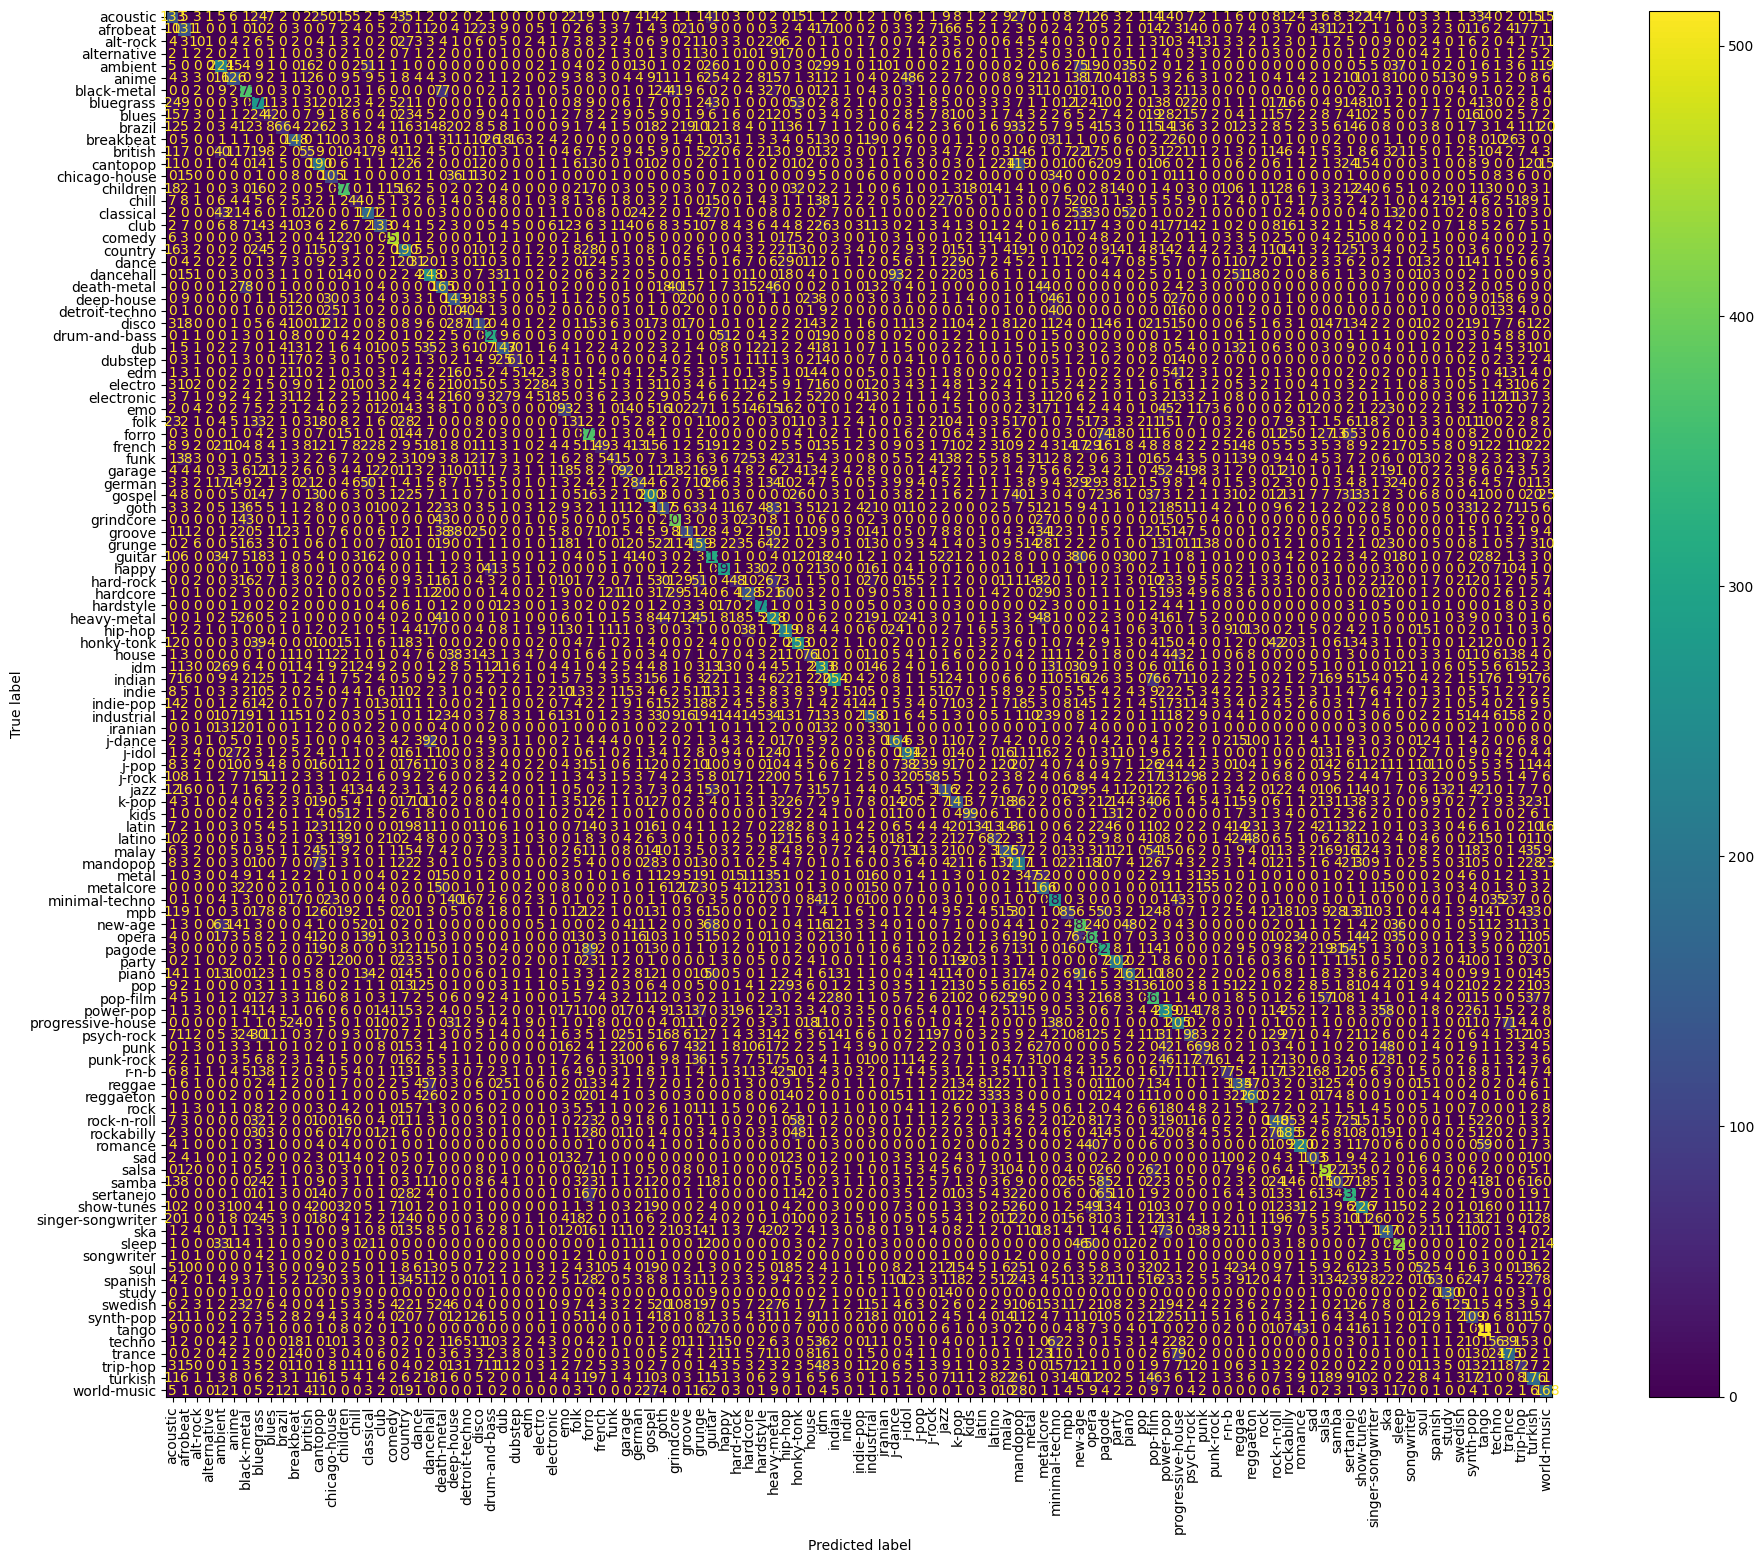

In [30]:
evaluation(pipe)

## **RandomizedSearchCV**

In [31]:
pipe = Pipeline([
    ('enc', encoder),
    ('model', XGBClassifier(random_state=42, tree_method="hist", n_jobs=-1)),
])

param_grid = {
    'model__max_depth': [5, 10, 15, None],
    'model__learning_rate': list(np.linspace(0.1, 0.5, 6)),
    'model__n_estimators': list(range(40, 210, 10)),
    'model__gamma': list(np.linspace(0, 1, 5)) + [None],
}

grid = RandomizedSearchCV(pipe, param_grid, cv=4, scoring='f1_weighted', n_jobs=-1, verbose=3)

grid.fit(X_train, y_train)

score = grid.best_score_
score = round(score,4)

params = grid.best_params_

print(f"Meilleur score : {round(score * 100, 2)}% \nMeilleurs paramètres : {params}")

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[CV 3/4] END model__gamma=0.0, model__learning_rate=0.42000000000000004, model__max_depth=10, model__n_estimators=40;, score=0.228 total time=16.3min
[CV 2/4] END model__gamma=0.0, model__learning_rate=0.42000000000000004, model__max_depth=10, model__n_estimators=40;, score=0.227 total time=16.4min
[CV 4/4] END model__gamma=0.0, model__learning_rate=0.42000000000000004, model__max_depth=10, model__n_estimators=40;, score=0.231 total time=16.5min
[CV 1/4] END model__gamma=0.0, model__learning_rate=0.42000000000000004, model__max_depth=10, model__n_estimators=40;, score=0.228 total time=16.5min
[CV 4/4] END model__gamma=0.75, model__learning_rate=0.42000000000000004, model__max_depth=15, model__n_estimators=100;, score=0.219 total time=21.1min
[CV 2/4] END model__gamma=0.75, model__learning_rate=0.42000000000000004, model__max_depth=15, model__n_estimators=100;, score=0.219 total time=21.3min
[CV 1/4] END model__gamma=0.75, mod

<h3>Résultats du Randomized</h3>
<ul>
<li>Meilleur score : 45.88%, Meilleurs paramètres : {'model__n_estimators': 150, 'model__max_depth': 15, 'model__learning_rate': 0.12222222222222223, 'model__gamma': 0.0}</li><br>
<li>Meilleur score : 45.08%, Meilleurs paramètres : {'model__n_estimators': 112, 'model__max_depth': 15, 'model__learning_rate': 0.18, 'model__gamma': 0.0}</li><br>
<li>Meilleur score : 44.96%, Meilleurs paramètres : {'model__n_estimators': 60, 'model__max_depth': 15, 'model__learning_rate': 0.1, 'model__gamma': 0.25}</li><br>
<li>Meilleur score : 44.7%, Meilleurs paramètres : {'model__n_estimators': 150, 'model__max_depth': 10, 'model__learning_rate': 0.1, 'model__gamma': 0.25}</li><br>
<li>Meilleur score : 43.5%, Meilleurs paramètres : {'model__n_estimators': 208, 'model__max_depth': 10, 'model__learning_rate': 0.18, 'model__gamma': 0.5}</li><br>
</ul>

In [32]:
pipe = Pipeline([
    ('enc', encoder),
    ('model', XGBClassifier(random_state=42, tree_method="hist", gamma=0, n_jobs=-1)),
])

param_grid = {
    'model__max_depth': [10, 15, 20, None],
    'model__learning_rate': list(np.linspace(0.1, 0.3, 10)),
    'model__n_estimators': list(range(100, 300, 10)),
}

grid = RandomizedSearchCV(pipe, param_grid, cv=4, scoring='f1_weighted', n_jobs=-1, verbose=3)

grid.fit(X_train, y_train)

score = grid.best_score_
score = round(score,4)

params = grid.best_params_

print(f"Meilleur score : {round(score * 100, 2)}% \nMeilleurs paramètres : {params}")

Fitting 4 folds for each of 10 candidates, totalling 40 fits


## **GridSearchCV**

In [ ]:
pipe = Pipeline([
    ('enc', encoder),
    ('model', XGBClassifier(random_state=42, tree_method="hist", gamma=0, n_jobs=-1)),
])

param_grid = {
    'model__max_depth': [10, 15, 20, 25],
    'model__learning_rate': list(np.linspace(0.1, 0.3, 3)),
    'model__n_estimators': list(range(140, 210, 10)),
}

grid = GridSearchCV(pipe, param_grid, cv=4, scoring='f1_weighted', n_jobs=-1, verbose=3)

grid.fit(X_train, y_train)

score = grid.best_score_
score = round(score,4)

params = grid.best_params_

best_model = grid.best_estimator_

print(f"Meilleur score : {round(score * 100, 2)}% \nMeilleurs paramètres : {params}")

NameError: name 'Pipeline' is not defined


        
Nom du modèle : XGBClassifier

        
F1 Score : 0.47228488147964165

        
Matrice de confusion : 
[[  51    0    1    3   35    4    1    3    2    0    2    0    1   15
     0    0    0    0    0    0    0    0    9    0    1   28]
 [   0    9    1    5   19    2    0    0    2    1    0    2    0    3
     0    0    1    0    0    1    0    0   14    1    2   13]
 [   0    0  247    5   26   20    0    0    5    0    0    0   23    7
     0   36   11    0    0    2    0    0    8    0    5   36]
 [   0    1    2  208   23   25    0    2    3    1    5    6    0   57
     0    0   10    0    1    4    0    0   40    0    6   62]
 [   5    0   32   24 1785   21    5    2   68    7   12    8    6   42
     0   13   34    2    6    4    5    1   76    3    2  200]
 [   1    0   18   22   44  147    0    4    5    1    6    4    5   19
     0   10   12    0    0    2    0    0   34    1    7   84]
 [   4    0    0    3   75    1   27    0   23    2    0    0    0    7
   

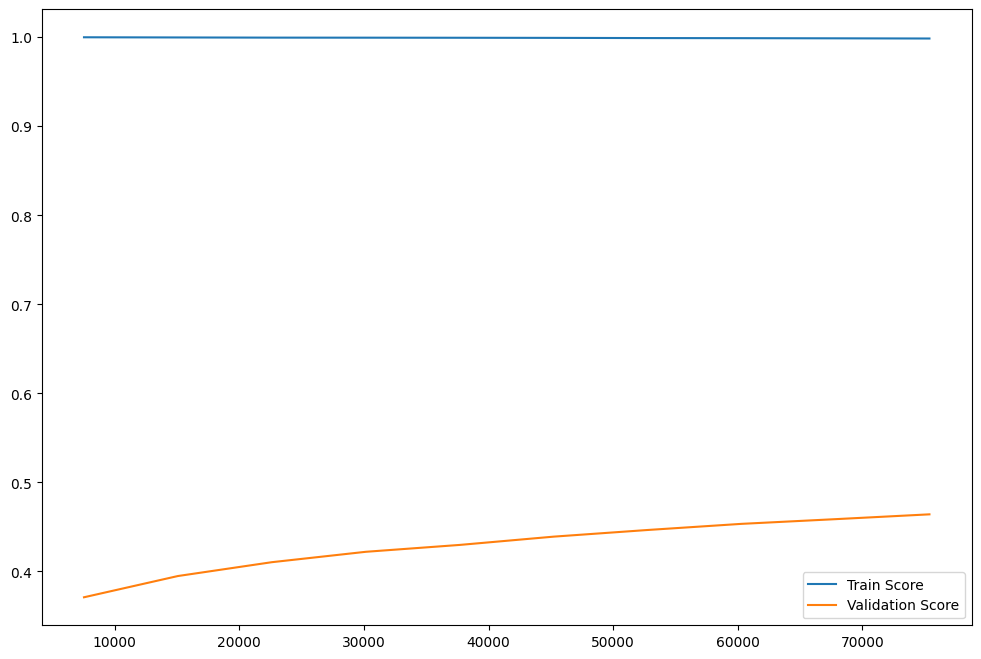

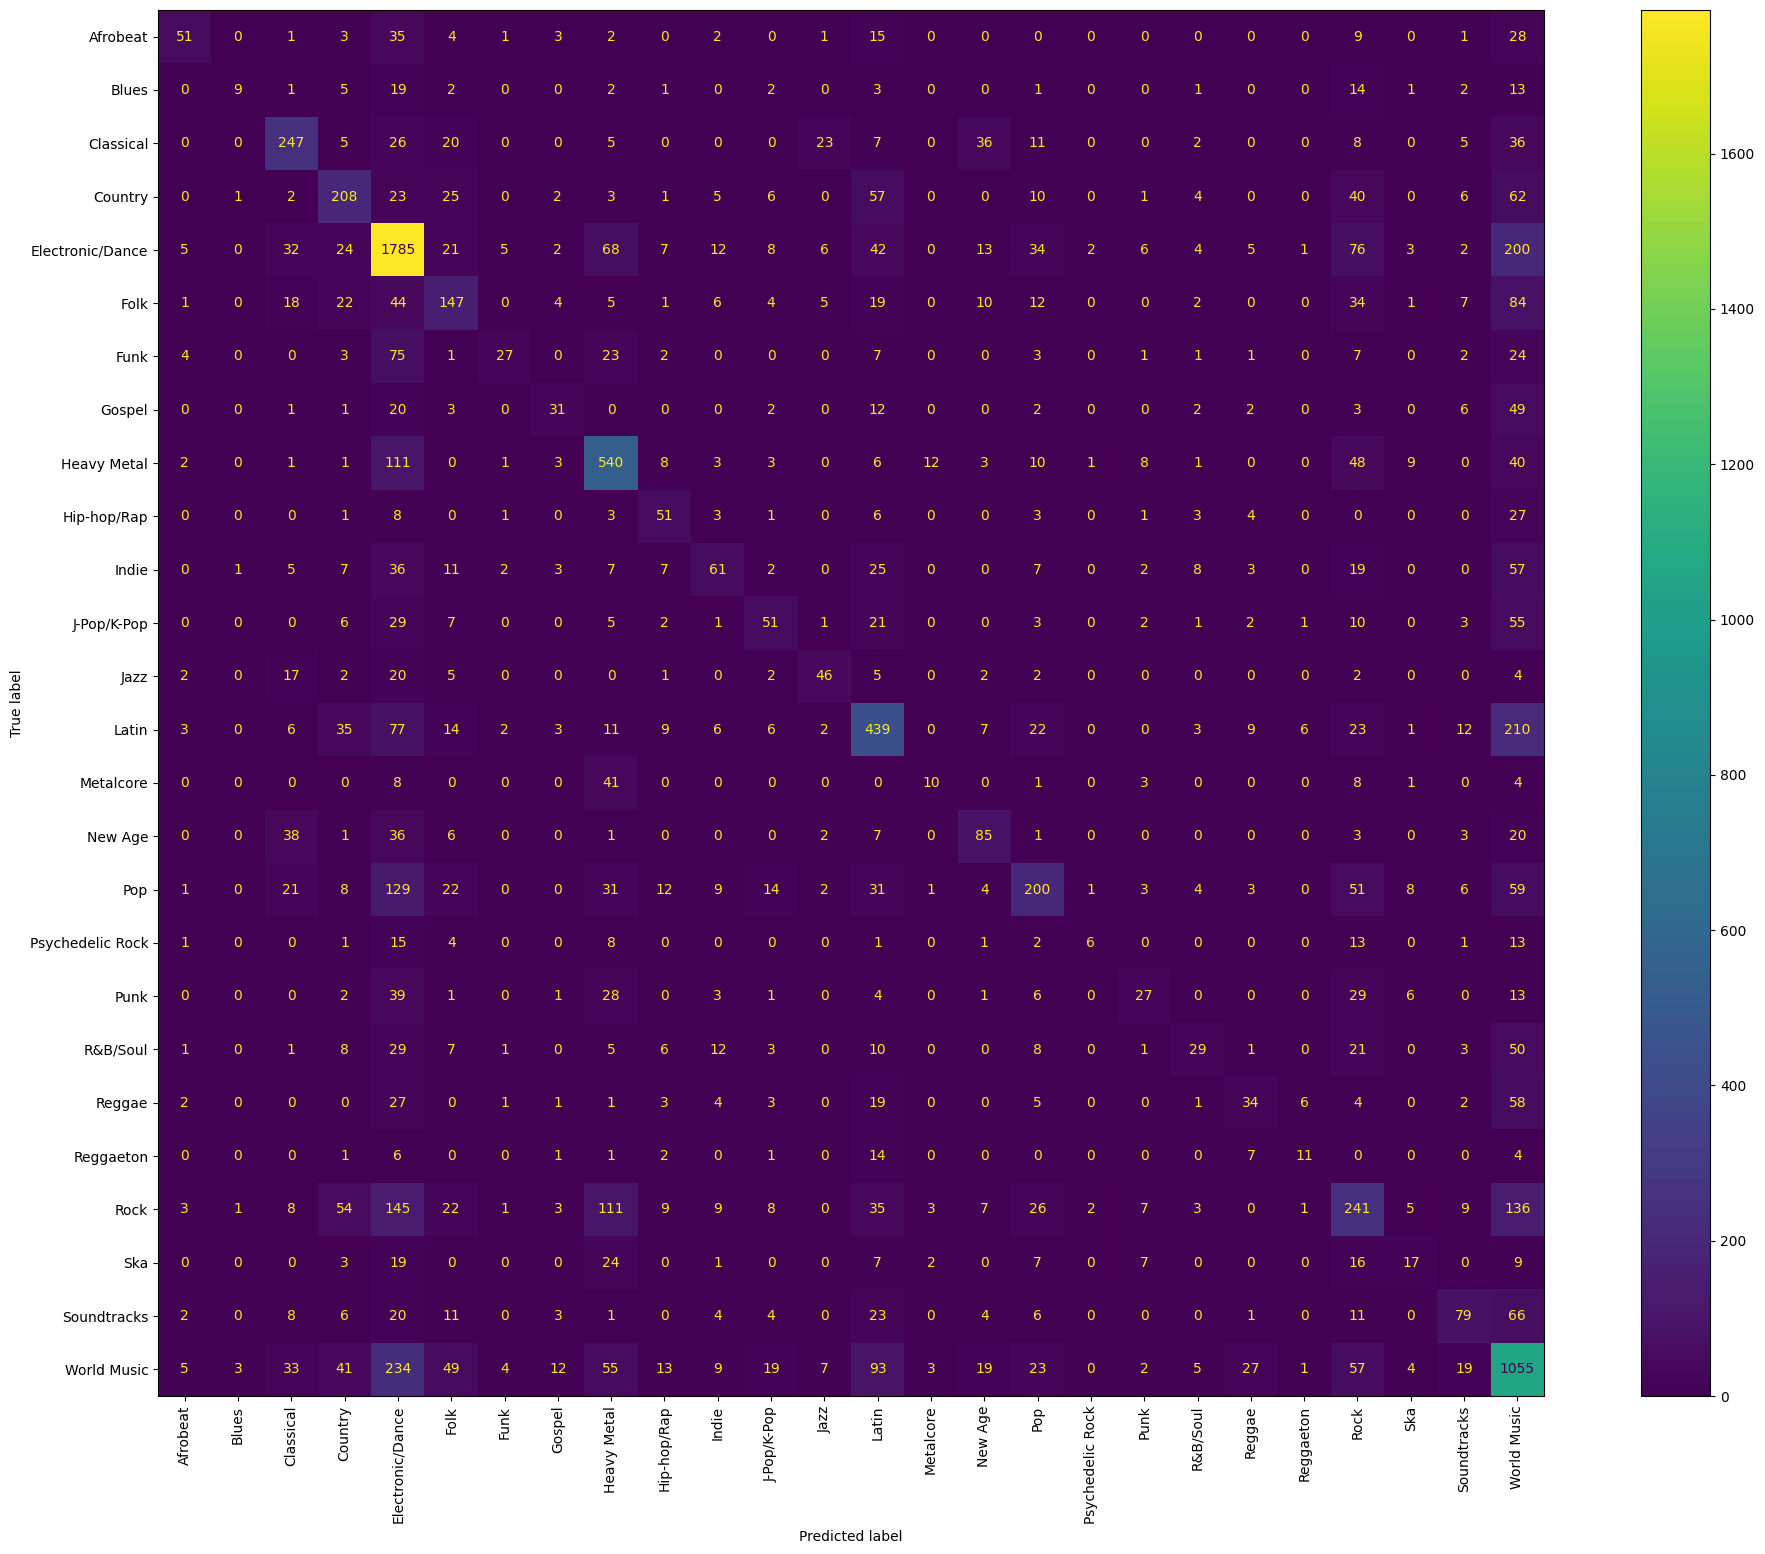

In [ ]:
evaluation_ln(best_model)

## **Dump**

{'model__n_estimators': 150, 'model__max_depth': 15, 'model__learning_rate': 0.12222222222222223, 'model__gamma': 0.0}

In [ ]:
pipe = Pipeline([
    ('enc', encoder),
    ('model', XGBClassifier(random_state=42, tree_method="hist", n_jobs=-1, learning_rate=0.15, max_depth=15, n_estimators=200)),
])

pipe.fit(X, y)

Pipeline(steps=[('enc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index([], dtype='object'))])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metri...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.15,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=15, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=200,
                               n_jobs=-1, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [ ]:
X

,release_date,duration_ms,explicit,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2022,234240.0,0,4.0,0.451,0.699,6.0,-6.955,0.0,0.0329,0.096900,0.001040,0.6570,0.5990,104.123,4.0
1,2022,243626.0,0,4.0,0.511,0.890,7.0,-6.774,0.0,0.0284,0.000768,0.000005,0.1240,0.3830,150.085,4.0
2,2022,135941.0,1,1.0,0.544,0.984,1.0,0.492,1.0,0.2670,0.026900,0.000007,0.8980,0.0400,120.325,3.0
3,2014,256478.0,0,5.0,0.444,0.991,7.0,-4.167,1.0,0.1330,0.000085,0.000084,0.1200,0.1060,124.016,4.0
4,2022,240093.0,0,7.0,0.616,0.710,9.0,-6.517,0.0,0.0309,0.194000,0.001430,0.0626,0.4260,100.030,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111667,2022,200785.0,0,2.0,0.392,0.984,11.0,-4.934,1.0,0.0647,0.000002,0.799000,0.1350,0.0698,123.566,4.0
111668,2022,183047.0,0,2.0,0.219,0.306,1.0,-15.525,0.0,0.0325,0.721000,0.964000,0.1280,0.0583,64.281,5.0
111669,2014,260573.0,0,2.0,0.423,0.360,3.0,-9.458,1.0,0.0372,0.728000,0.000000,0.1050,0.2910,130.576,4.0
111670,2022,330666.0,0,6.0,0.374,0.992,0.0,-3.014,0.0,0.1290,0.000006,0.324000,0.1630,0.0599,139.997,4.0


In [ ]:
y

array([18,  4,  8, ..., 25, 22, 12])

In [ ]:
pipe.score(X, y)

0.9979135138039419

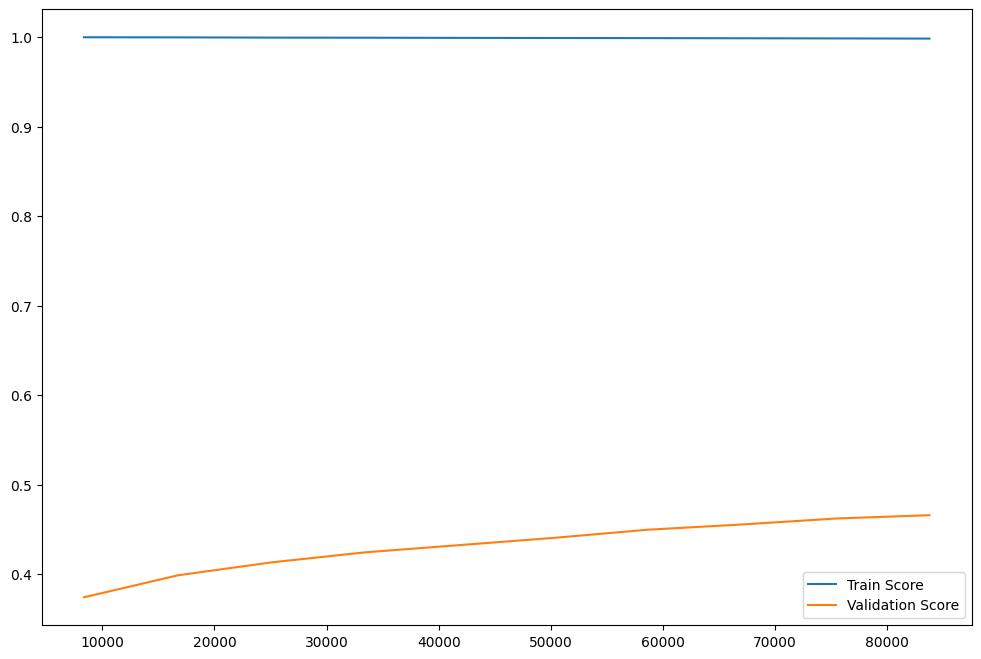

In [ ]:
N, train_score, val_score = learning_curve(pipe, X, y,
                                            n_jobs=-1,
                                            cv = 4, scoring='f1_weighted',
                                            train_sizes=np.linspace(0.1,1,10))

plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='Train Score')
plt.plot(N, val_score.mean(axis=1), label='Validation Score')
plt.legend()
plt.show()

In [ ]:
dump(pipe, f"models/{pipe.named_steps.model.__class__.__name__}_genre.pkl")

dump(transform, f"models/LabelEncoder_genre.pkl")

['models/LabelEncoder_genre.pkl']

## **MLFlow**

In [ ]:
import mlflow

In [ ]:
experiment_name = "Modelisation Genre"

In [ ]:
try:
    experiment_id = mlflow.get_experiment_by_name(experiment_name).experiment_id
except AttributeError:
    experiment_id = mlflow.create_experiment(experiment_name)

eval_data = X_test
eval_data["label"] = y_test

with mlflow.start_run(experiment_id=experiment_id, nested=True, run_name=best_model[-1].__class__.__name__):
    mlflow.log_params(best_model[-1].get_params())
    mlflow.sklearn.log_model(best_model, experiment_name)
    model_uri = mlflow.get_artifact_uri(experiment_name)

    result = mlflow.evaluate(
            model_uri,
            eval_data,
            targets="label",
            model_type="regressor",
            evaluators=["default"],
    )